# Volume 2: The Discrete Fourier Transform

In [59]:
import IPython
from IPython.display import Audio, display
import numpy as np
from scipy.io import wavfile
from scipy.fftpack import fft
from matplotlib import pyplot as plt

In [60]:
plt.rcParams["figure.dpi"] = 300             # Fix plot quality.
plt.rcParams["figure.figsize"] = (12, 3)      # Change plot size / aspect (you may adjust this).

In [74]:
class SoundWave(object):
    """A class for working with digital audio signals."""

    # Problem 1
    def __init__(self, rate, samples):
        """Set the SoundWave class attributes.

        Parameters:
            rate (int): The sample rate of the sound.
            samples ((n,) ndarray): NumPy array of samples.
        """
        self.rate = rate
        self.samples = samples
        self.time = np.arange(len(samples)) / rate
        self.freq = np.fft.rfftfreq(len(samples), 1/rate)
        

    # Problems 1 and 7
    def plot(self, show_dft=False):
        """Plot the graph of the sound wave (time versus amplitude)."""
        if show_dft:
            fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 6))

            # Time-domain plot
            ax1.plot(self.time, self.samples)
            ax1.set_xlabel("Time (s)")
            ax1.set_ylabel("Amplitude")
            ax1.set_title("Sound Wave")

            # Frequency-domain plot
            freq_data = np.fft.rfft(self.samples)
            magnitude = np.abs(freq_data)

            ax2.plot(self.freq, magnitude)
            ax2.set_xlabel("Frequency (Hz)")
            ax2.set_ylabel("Magnitude")
            ax2.set_title("Frequency Spectrum (DFT)")

            plt.tight_layout()

        else:
            plt.plot(self.time, self.samples)
            plt.xlabel("Time (s)")
            plt.ylabel("Amplitude")
            plt.title("Sound Wave")

    # Problem 2
    def export(self, filename: str, force=False) -> None:
        """Generate a wav file from the sample rate and samples. 
        If the array of samples is not of type np.int16, scale it before exporting.

        Parameters:
            filename (str): The name of the wav file to export the sound to.
        """
        if self.samples.dtype == np.int16:
            wavfile.write(filename, self.rate, self.samples)
            return

        # Otherwise require explicit confirmation.
        if not force:
            raise ValueError(
                "Samples are of type {} — set force=True to scale to int16."
                .format(self.samples.dtype)
            )

        # ----- automatic scaling to int16 -----
        data = self.samples.astype(np.float64)

        # Normalise to [-1, 1] and then to int16 range [-32768, 32767].
        peak = np.abs(data).max() or 1.0          # avoid div‑by‑zero
        scaled = (data / peak * 32767).astype(np.int16)

        wavfile.write(filename, self.rate, scaled)
        print("Exported to {}".format(filename))    
    
    # Problem 4
    def __add__(self, other):
        """Combine the samples from two SoundWave objects.

        Parameters:
            other (SoundWave): An object containing the samples to add
                to the samples contained in this object.
        
        Returns:
            (SoundWave): A new SoundWave instance with the combined samples.

        Raises:
            ValueError: if the two sample arrays are not the same length.
        """
        if not isinstance(other, SoundWave):
            return NotImplemented                      # allow NumPy to try other dtypes

        if len(self.samples) != len(other.samples):
            raise ValueError("SoundWave objects must have the same number of samples")

        # Promote to float64 to minimise clipping/overflow when summing
        combined = self.samples.astype(np.float64) + other.samples.astype(np.float64)
        return SoundWave(self.rate, combined)


    # Problem 4
    def __rshift__(self, other):
        """Concatentate the samples from two SoundWave objects.

        Parameters:
            other (SoundWave): An object containing the samples to concatenate
                to the samples contained in this object.

        Raises:
            ValueError: if the two sample rates are not equal.
        """
        if not isinstance(other, SoundWave):
            return NotImplemented                     # allow NumPy fallback

        if self.rate != other.rate:
            raise ValueError("Sample rates differ: {} Hz vs {} Hz"
                             .format(self.rate, other.rate))

        concatenated = np.concatenate([self.samples, other.samples])
        return SoundWave(self.rate, concatenated)


## Problem 1

- Implement `SoundWave.__init__()`.
- Implement `SoundWave.plot()`.
- Use SciPy's `wavfile.read()` and the `SoundWave` class to plot `tada.wav` in the cell below.

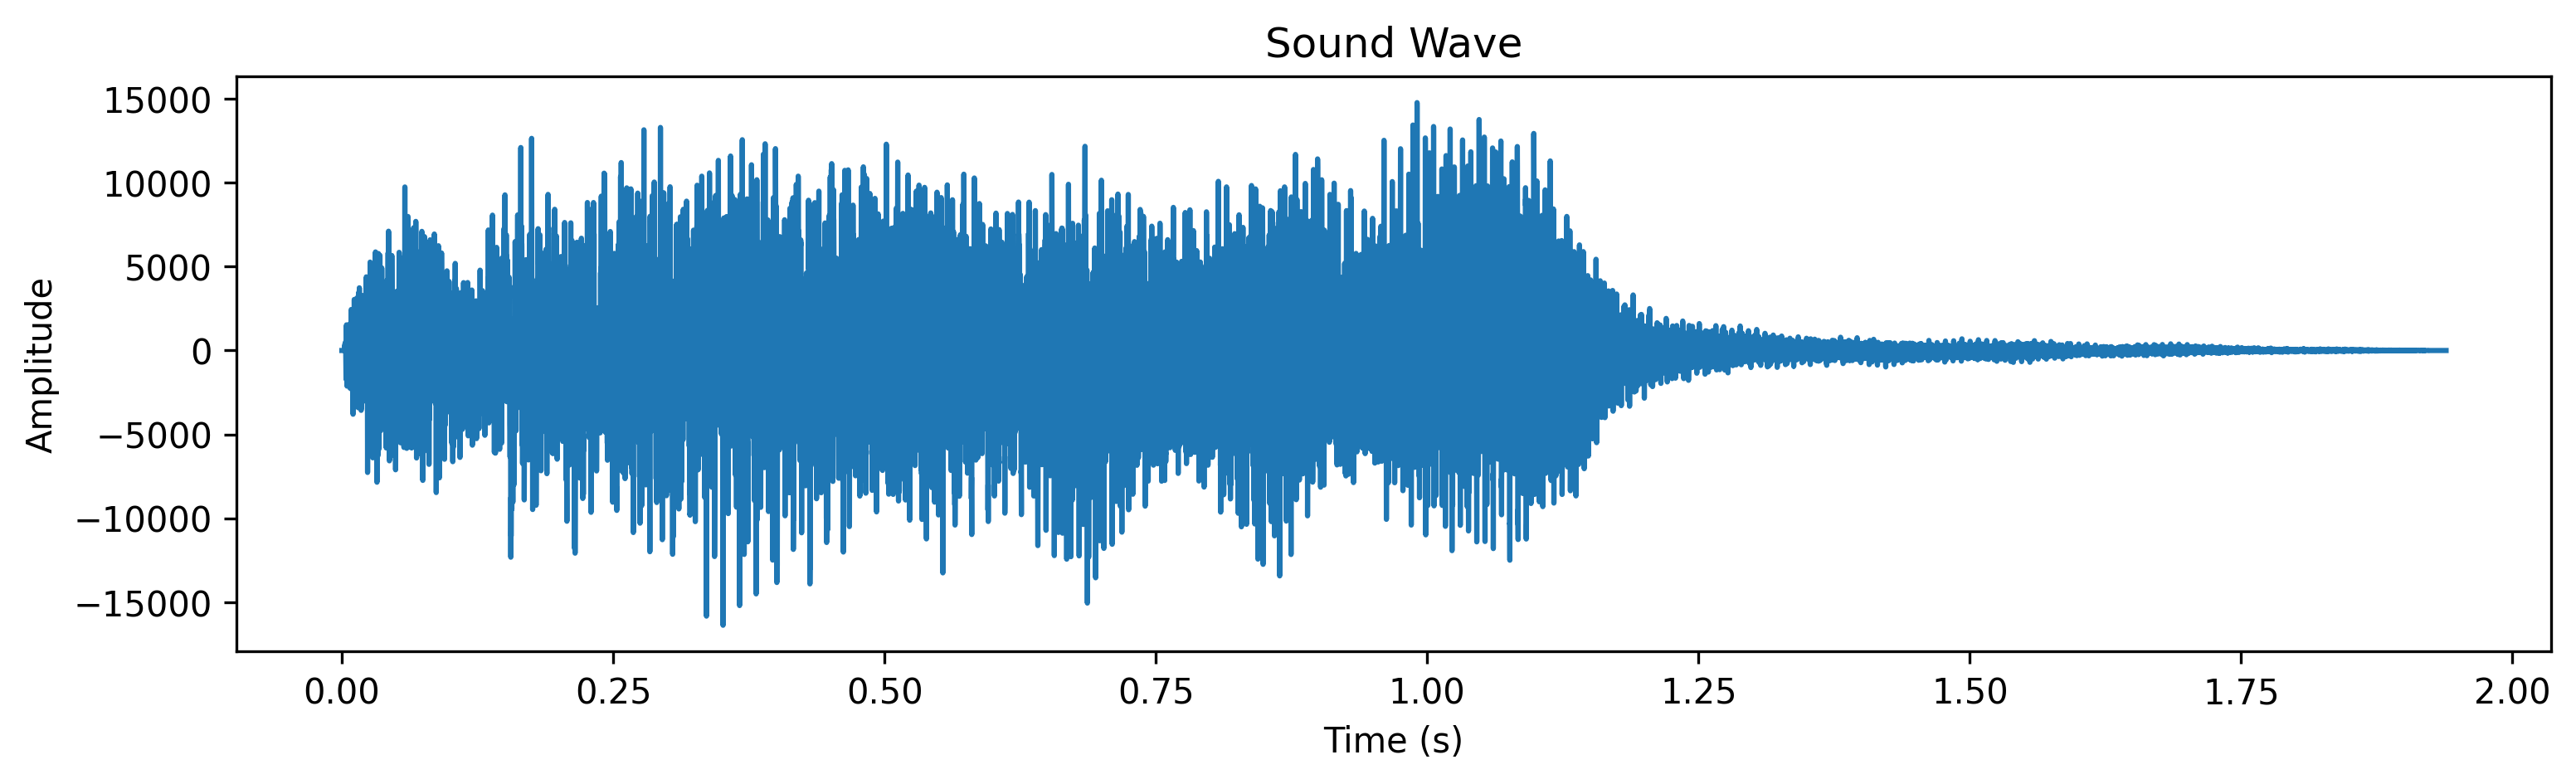

In [62]:
rate, samples = wavfile.read("tada.wav")
sw = SoundWave(rate, samples)
try:
    sw.plot()
except NotImplementedError:
    pass

plt.show()

## Problem 2

- Implement `SoundWave.export()`.
- Use the `export()` method to create two new files containing the same sound as `tada.wav`: one without scaling, and one with scaling (use `force=True`).
- Use `IPython.display.Audio()` to embed the original and two new versions of `tada.wav` in the cells below.

In [63]:
# (a) No scaling
sw.export("tada_noscale.wav")

# (b) With scaling – force=True
sw.export("tada_scaled.wav", force=True)


In [64]:
display(Audio("tada.wav", autoplay=False, element_id='orig'))
display(Audio("tada_noscale.wav", autoplay=False, element_id='noscale'))
display(Audio("tada_scaled.wav", autoplay=False, element_id='scaled'))


## Problem 3

- Implement `generate_note()`.
- Use `generate_note()` to create an A tone that lasts for two seconds. Embed it in the cell below.

In [65]:
def generate_note(frequency, duration):
    """Generate an instance of the SoundWave class corresponding to 
    the desired soundwave. Uses sample rate of 44100 Hz.
    
    Parameters:
        frequency (float): The frequency of the desired sound.
        duration (float): The length of the desired sound in seconds.
    
    Returns:
        sound (SoundWave): An instance of the SoundWave class.
    """
    sample_rate = 44100  # Standard sample rate for audio
    t = np.linspace(0, duration, int(sample_rate * duration), endpoint=False)
    samples = np.sin(2.0 * np.pi * frequency * t).astype(np.float32)
    return SoundWave(sample_rate, samples)

In [66]:
w = generate_note(440, 2)  # Generate a 440 Hz note for 2 second
w.export("440Hz.wav", force=True) # Export the soundwave
display(Audio("440Hz.wav", autoplay=False, element_id='440Hz')) # Display the soundwave

Exported to 440Hz.wav


## Problem 4

- Implement `SoundWave.__add__()`.
- Generate a three-second A minor chord (A, C, and E) and embed it in the first cell below.
- Implement `SoundWave.__rshift__()`.
- Generate the arpeggio A &rarr; C &rarr; E, where each tone lasts one second, and embed it in the second cell below.

In [67]:
# Fundamental frequencies
# Source: https://www1.swarthmore.edu/NatSci/ceverba1/Class/e5_2006/MusicalScales.html
a = generate_note(440, 3)   # A4
c = generate_note(261.63, 3) # C4
e = generate_note(329.63, 3) # E4

chord = a + c + e
chord.export("am_chord.wav", force=True)
display(Audio("am_chord.wav", autoplay=False, element_id="am-chord"))


Exported to am_chord.wav


In [68]:
a1 = generate_note(440, 1)
c1 = generate_note(261.63, 1)
e1 = generate_note(329.63, 1)

arpeggio = a1 >> c1 >> e1
arpeggio.export("am_arpeggio.wav", force=True)
display(Audio("am_arpeggio.wav", autoplay=False, element_id="am-arpeggio"))


Exported to am_arpeggio.wav


## Problem 5

- Implement `simple_dft()` with the formula $c=F_nf$, where $F_n$ is the n-dimensional DFT matrix.
- In the cell below, use `np.allclose()` to check that `simple_dft()` and `scipy.fftpack.fft()` give the same result (after scaling).

In [69]:
def simple_dft(samples):
    """Compute the DFT of an array of samples.

    Parameters:
        samples ((n,) ndarray): an array of samples.
    
    Returns:
        ((n,) ndarray): The DFT of the given array.
    """
    n = len(samples)
    j, k = np.meshgrid(np.arange(n), np.arange(n))  # shape (n, n)
    W = np.exp(-2j * np.pi * j * k / n)             # DFT matrix F_n
    return W @ samples


In [71]:
samples = np.random.rand(64)
assert np.allclose(simple_dft(samples), fft(samples)) 
# Should return True if `simple_dft()` and `scipy.fftpack.fft()` give the same result (after scaling).

## Problem 6

- Implement `simple_fft()`.
- In the cell below:
    - Generate an array of $8192$ random samples and take its DFT using `simple_dft()`, `simple_fft()`, and `scipy.fftpack.fft()`.
    - Print the runtimes of each computation.
    - Use `np.allclose()` to check that `simple_fft()` and `scipy.fftpack.fft()` give the same result (after scaling).

In [72]:
def simple_fft(samples, threshold=1):
    """Compute the DFT using the FFT algorithm.
    
    Parameters:
        samples ((n,) ndarray): an array of samples.
        threshold (int): when a subarray of samples has fewer
            elements than this integer, use simple_dft() to
            compute the DFT of that subarray.
    
    Returns:
        ((n,) ndarray): The DFT of the given array.
    """
    n = len(samples)
    if n <= threshold:
        return simple_dft(samples)

    if n % 2 != 0:
        raise ValueError("Input size must be a power of 2")

    even = simple_fft(samples[::2], threshold)
    odd = simple_fft(samples[1::2], threshold)

    factor = np.exp(-2j * np.pi * np.arange(n) / n)
    return np.concatenate([even + factor[:n // 2] * odd,
                           even - factor[:n // 2] * odd])


In [73]:
import time

# Generate random signal of length 8192
samples = np.random.rand(8192)

# Time simple_dft
start = time.time()
dft_result = simple_dft(samples)
dft_time = time.time() - start

# Time simple_fft
start = time.time()
fft_result = simple_fft(samples, threshold=32)  # threshold chosen for speed
fft_time = time.time() - start

# Time scipy.fft
start = time.time()
scipy_result = fft(samples)
scipy_time = time.time() - start

# Output runtimes
print(f"simple_dft: {dft_time:.4f} s")
print(f"simple_fft: {fft_time:.4f} s")
print(f"scipy.fft: {scipy_time:.4f} s")

# Check correctness
print("simple_fft ≈ scipy.fft:", np.allclose(fft_result, scipy_result))


simple_dft: 7.5031 s
simple_fft: 0.0151 s
scipy.fft: 0.0001 s
simple_fft ≈ scipy.fft: True


## Problem 7

- Modify `SoundWave.plot()` so that it accepts a boolean. When the boolean is `True`, take the DFT of the stored samples and plot (in a new subplot) the frequencies present on the $x$-axis and the magnituds of those frequences on the $y$-axis. Only the display the first half of the plot, and adjust the $x$-axis so that it correctly shows the frequencies in Hertz.
- Display the plot of the DFT of the A tone from Problem 4 the first cell below.
- Display the plot of the DFT of the A minor chord from Problem 4 in the second cell below.

: 

: 

: 

: 

## Problem 8

Use the DFT to determine the individual notes that are present in `mystery_chord.wav`.

: 

: 

The notes are...